<a href="https://www.kaggle.com/code/simonflora/food-security-indicators-for-philippines-ipynb?scriptVersionId=261906275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
path = '/kaggle/input/philippines-food-security-and-nutrition-indicators/suite-of-food-security-indicators_phl.csv'
df = pd.read_csv(path)
df = df.iloc[1:]
df.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
1,PHL,2000-01-01,2002-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,109,E,NaN
2,PHL,2001-01-01,2003-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,109,E,NaN
3,PHL,2002-01-01,2004-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,110,E,NaN
4,PHL,2003-01-01,2005-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,111,E,NaN
5,PHL,2004-01-01,2006-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20042006.0,2006,%,112,E,NaN


In [3]:
df.tail()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
1093,PHL,2016-01-01,2018-12-31,171.0,'608,Philippines,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20162018.0,2018,g/cap/d,57.4,E,NaN
1094,PHL,2017-01-01,2019-12-31,171.0,'608,Philippines,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20172019.0,2019,g/cap/d,56,E,NaN
1095,PHL,2018-01-01,2020-12-31,171.0,'608,Philippines,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20182020.0,2020,g/cap/d,52.9,E,NaN
1096,PHL,2019-01-01,2021-12-31,171.0,'608,Philippines,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20192021.0,2021,g/cap/d,51.1,E,NaN
1097,PHL,2020-01-01,2022-12-31,171.0,'608,Philippines,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20202022.0,2022,g/cap/d,52.6,E,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             1097 non-null   object 
 1   StartDate        1097 non-null   object 
 2   EndDate          1097 non-null   object 
 3   Area Code        1097 non-null   float64
 4   Area Code (M49)  1097 non-null   object 
 5   Area             1097 non-null   object 
 6   Item Code        1097 non-null   object 
 7   Item             1097 non-null   object 
 8   Element Code     1097 non-null   float64
 9   Element          1097 non-null   object 
 10  Year Code        1097 non-null   float64
 11  Year             1097 non-null   object 
 12  Unit             1075 non-null   object 
 13  Value            938 non-null    object 
 14  Flag             1097 non-null   object 
 15  Note             181 non-null    object 
dtypes: float64(3), object(13)
memory usage: 137.3+ KB


In [5]:
df["Year"] = df["Year"].astype(int)
df["Value"] = df["Value"].astype(float)

In [6]:
df.describe()

,Area Code,Element Code,Year Code,Year,Value
count,1097.0,1097.000000,1.097000e+03,1097.000000,938.000000
mean,171.0,15776.963537,9.604876e+06,2013.484047,418.607026
std,0.0,20962.166563,1.006485e+07,6.756990,1257.916552
min,171.0,6121.000000,2.000000e+03,2000.000000,-1.780000
25%,171.0,6121.000000,2.010000e+03,2008.000000,4.000000
50%,171.0,6126.000000,2.022000e+03,2015.000000,19.850000
75%,171.0,6132.000000,2.016202e+07,2019.000000,56.775000
max,171.0,61322.000000,2.021202e+07,2023.000000,9488.600000


In [7]:
df.shape

(1097, 16)

In [8]:
df.columns

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item', 'Element Code', 'Element', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Iso3                 0
StartDate            0
EndDate              0
Area Code            0
Area Code (M49)      0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                22
Value              159
Flag                 0
Note               916
dtype: int64

In [11]:
df['Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Rail lines density (total route in km per 100 square km of land area)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the

In [12]:
df['Item Code'].unique()

array(['21010', '220001', '22000', '21012', '21013', '21014', '21016',
       '22013', '210041', '210011', '210401', '210401M', '210401F',
       '210091', '210091M', '210091F', '210071', '210071M', '210071F',
       '210081', '210081M', '210081F', '21035', '21034', '21033', '21032',
       '21031', '21045', '21047', '21046', '21048', '21026', '210260',
       '21025', '210250', '21041', '210410', '21042', '210420', '21043',
       '210430', '21044', '21049', '210490', '21056', '21057', '21058',
       '21059', '21061'], dtype=object)

In [13]:
len(df['Item Code'].unique())

49

In [14]:
len(df['Item'].unique())

49

# Thematic: Food Security & Nutritional Adequacy Indicators

This group reflects **dietary energy supply, adequacy, and undernourishment** — core measures of national food security.

---

## Indicators (code — exact item name)

1. **21010 – Average dietary energy supply adequacy (percent) (3-year average)**  
   Measures the adequacy of food energy supply relative to requirements.  
   *Questions:* Is the population’s energy intake meeting the recommended threshold?

2. **220001 – Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)**  
   Daily per-capita calorie supply used in PoU calculations.  
   *Questions:* What is the per-capita calorie supply used to estimate hunger?

3. **22000 – Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)**  
   3-year average of the per-capita calorie supply metric.  
   *Questions:* Is multi-year calorie supply stable or changing?

4. **21012 – Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)**  
   Reflects dietary diversity and staple reliance.  
   *Questions:* Is the diet dominated by staples?

5. **21013 – Average protein supply (g/cap/day) (3-year average)**  
   Tracks protein availability in the national food supply.  
   *Questions:* Are protein needs being met?

6. **22013 – Gross domestic product per capita, PPP (constant 2017 international $)**  
   Proxy for economic access to food.  
   *Questions:* How does income influence affordability and access?

7. **210041 – Prevalence of undernourishment (percent) (3-year average)**  
   Proportion of population below minimum energy requirements.  
   *Questions:* How widespread is chronic hunger?

8. **210011 – Number of people undernourished (million) (3-year average)**  
   Absolute scale of undernourishment.  
   *Questions:* How many individuals are affected?

9. **210091 – Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)**  
   Share of population facing moderate or severe food insecurity.  
   *Questions:* What portion of the population lacks reliable access to adequate food?

10. **210081 – Number of moderately or severely food insecure people (million) (3-year average)**  
    Absolute count of people facing moderate or severe food insecurity.  
    *Questions:* What is the population-level burden (for planning/resources)?

---

## Why This Group Matters
These indicators together capture **calorie adequacy, protein availability, dietary composition, prevalence and scale of undernourishment and food insecurity**, forming a compact dashboard for SDG-2 monitoring and policy response.

In [15]:
df_group1 = df[df['Item Code'].isin([
    '21010',   # Average dietary energy supply adequacy (percent) (3-year average)
    '220001',  # Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)
    '22000',   # Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)
    '21012',   # Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)
    '21013',   # Average protein supply (g/cap/day) (3-year average)
    '22013',   # Gross domestic product per capita, PPP, (constant 2017 international $)
    '210041',  # Prevalence of undernourishment (percent) (3-year average)
    '210011',  # Number of people undernourished (million) (3-year average)
    '210091',  # Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)
    '210081'   # Number of moderately or severely food insecure people (million) (3-year average)
])]
df_group1.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
1,PHL,2000-01-01,2002-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,109.0,E,NaN
2,PHL,2001-01-01,2003-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,109.0,E,NaN
3,PHL,2002-01-01,2004-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,110.0,E,NaN
4,PHL,2003-01-01,2005-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,111.0,E,NaN
5,PHL,2004-01-01,2006-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20042006.0,2006,%,112.0,E,NaN


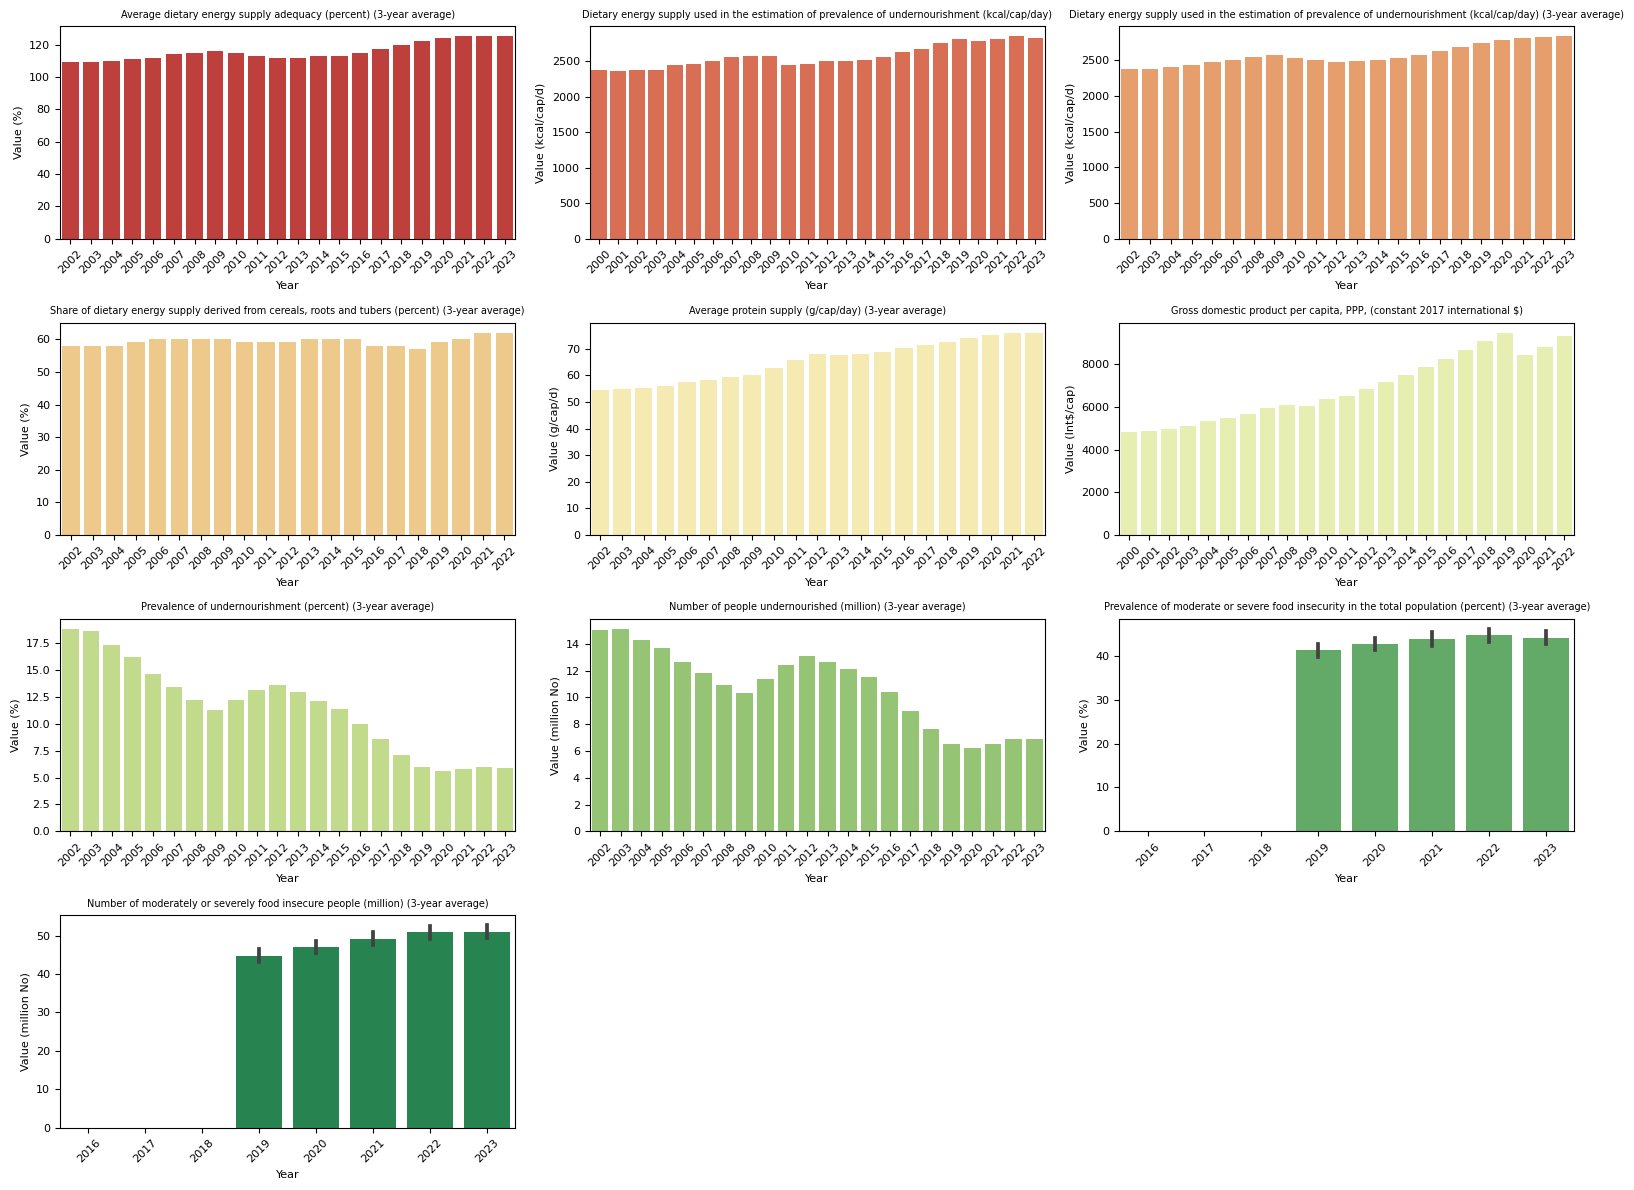

In [16]:
items = {
    '21010': 'Average dietary energy supply adequacy (percent) (3-year average)',
    '220001': 'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)',
    '22000': 'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
    '21012': 'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    '21013': 'Average protein supply (g/cap/day) (3-year average)',
    '22013': 'Gross domestic product per capita, PPP, (constant 2017 international $)',
    '210041': 'Prevalence of undernourishment (percent) (3-year average)',
    '210011': 'Number of people undernourished (million) (3-year average)',
    '210091': 'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
    '210081': 'Number of moderately or severely food insecure people (million) (3-year average)'
}

palette = sns.color_palette('RdYlGn', n_colors=len(items))
n_cols = 3
n_rows = (len(items) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, (code, label) in enumerate(items.items()):
    df_temp = df_group1[df_group1['Item Code'] == code].copy()
    if df_temp.empty:
        continue
    df_temp['Year'] = df_temp['Year'].astype(int)
    df_temp['Value'] = df_temp['Value'].astype(float)
    
    sns.barplot(x='Year', y='Value', data=df_temp, color=palette[i], ax=axes[i])
    axes[i].set_title(label, fontsize=7)
    axes[i].set_xlabel('Year', fontsize=8)
    axes[i].set_ylabel('Value ' + '('+ df_temp['Unit'].iloc[0] + ')', fontsize=8)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Dietary Energy Supply vs. Prevalence of Undernourishment

This visualization compares **average dietary energy supply adequacy** and **prevalence of undernourishment** over time for the Philippines. Both indicators provide complementary insights into **food security and nutritional adequacy**:

- **Average dietary energy supply adequacy (21010)**: Measures how sufficient the population’s food energy supply is relative to requirements.
- **Prevalence of undernourishment (210041)**: Shows the proportion of the population whose intake falls below minimum dietary energy needs.

**Key Features of the Visualization**:
- Years are shown on the x-axis for temporal trend analysis.
- Line plots with markers make it easier to track changes over time.
- Legend is positioned outside for clarity.
- Allows comparison between energy supply and undernourishment trends.

**Insights You Can Explore**:
- Are improvements in dietary energy supply mirrored by reductions in undernourishment?
- Are there periods where the population’s energy supply is adequate, yet undernourishment persists?

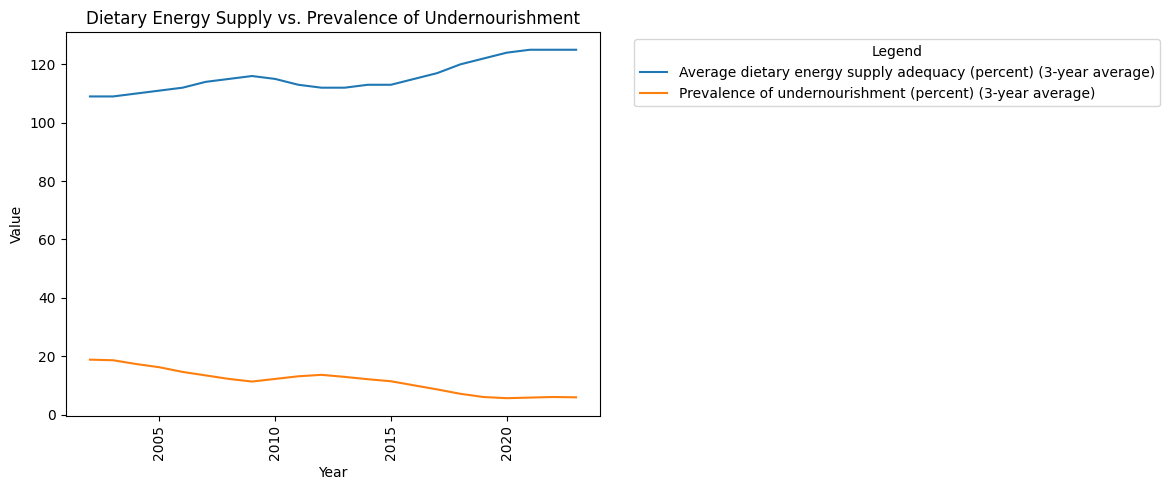

In [17]:
df_plot = df_group1[df_group1['Item Code'].isin(['21010', '210041'])].copy()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Value', hue='Item', data=df_plot)

plt.title('Dietary Energy Supply vs. Prevalence of Undernourishment')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Economic Growth vs. Undernourishment

This visualization compares **Gross Domestic Product per capita**, **number of people undernourished**, and **prevalence of undernourishment** over time for the Philippines. These indicators together provide a more **holistic view of economic and nutritional status**:

- **Gross Domestic Product per capita (22013)**: Represents the average economic output per person, indicating general wealth and resources available.
- **Prevalence of undernourishment (210041)**: Proportion of the population experiencing chronic hunger.

**Key Features of the Visualization**:
- Years are shown on the x-axis to observe temporal trends.
- Line plots for each indicator allow comparison of trajectories over time.
- Legend positioned outside for clarity.
- Dual-axis or scaling ensures indicators with different magnitudes can be visualized together.

**Insights You Can Explore**:
- Does rising GDP per capita coincide with a reduction in undernourishment?
- Are there periods where economic growth does not reduce food insecurity?
- How do absolute and relative measures of undernourishment compare over time?

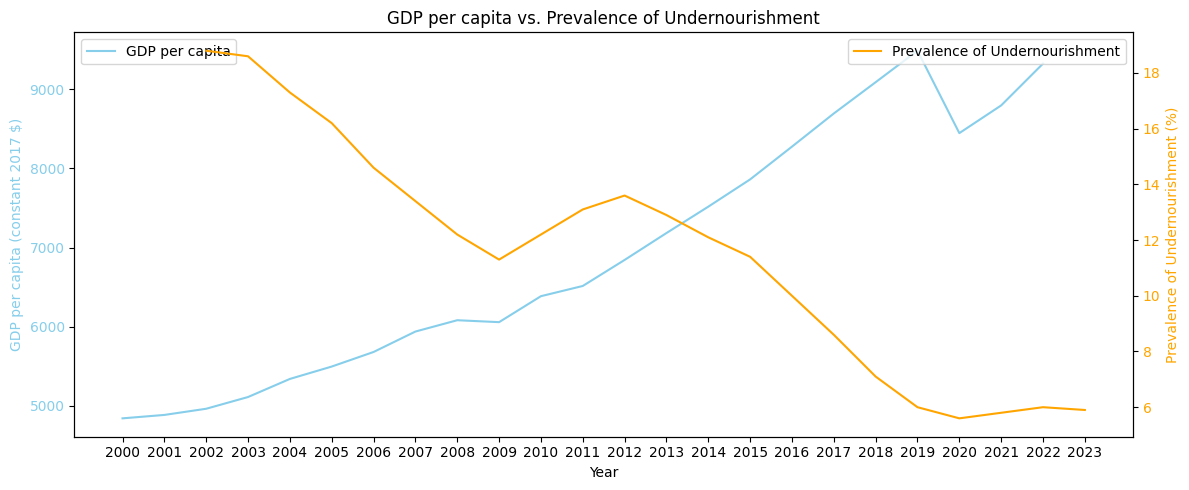

In [18]:
df_plot = df_group1[df_group1['Item Code'].isin(['22013', '210041'])].copy()
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['Value'] = df_plot['Value'].astype(float)

fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()

df_gdp = df_plot[df_plot['Item Code'] == '22013']
df_undernourished = df_plot[df_plot['Item Code'] == '210041']

sns.lineplot(x='Year', y='Value', data=df_gdp, ax=ax1, color='skyblue', label='GDP per capita')
sns.lineplot(x='Year', y='Value', data=df_undernourished, ax=ax2, color='orange', label='Prevalence of Undernourishment')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita (constant 2017 $)', color='skyblue')
ax2.set_ylabel('Prevalence of Undernourishment (%)', color='orange')

ax1.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.set_xticks(df_plot['Year'].unique())
plt.title('GDP per capita vs. Prevalence of Undernourishment')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Population Undernourished vs. Moderately/Severely Food Insecure

This visualization compares the **number of people undernourished** and the **number of moderately or severely food insecure people** in the Philippines over time. Both indicators provide complementary insights into **food security and nutritional adequacy**:

- **Number of people undernourished (210011)**: Represents the absolute number of individuals whose dietary energy intake falls below minimum requirements.  
- **Number of moderately or severely food insecure people (210081)**: Captures a broader population experiencing food insecurity, including those who may not be undernourished yet still lack sufficient access to nutritious food.

**Key Features of the Visualization**:  
- Years are shown on the x-axis to highlight temporal trends.  
- Stacked area chart emphasizes **relative contribution** of each group to the total affected population.  
- Allows visual comparison between the **absolute number of undernourished** and those experiencing **moderate or severe food insecurity**.

**Insights You Can Explore**:  
- How has the total population affected by food insecurity changed over time?  
- Are reductions in undernourishment accompanied by a decrease in moderate/severe food insecurity?  
- Is there a shift in the composition of food insecurity, e.g., fewer undernourished but more moderately/severely food insecure?  
- This visualization can help guide **policy interventions** focused on both **hunger reduction** and **broader food security measures**.

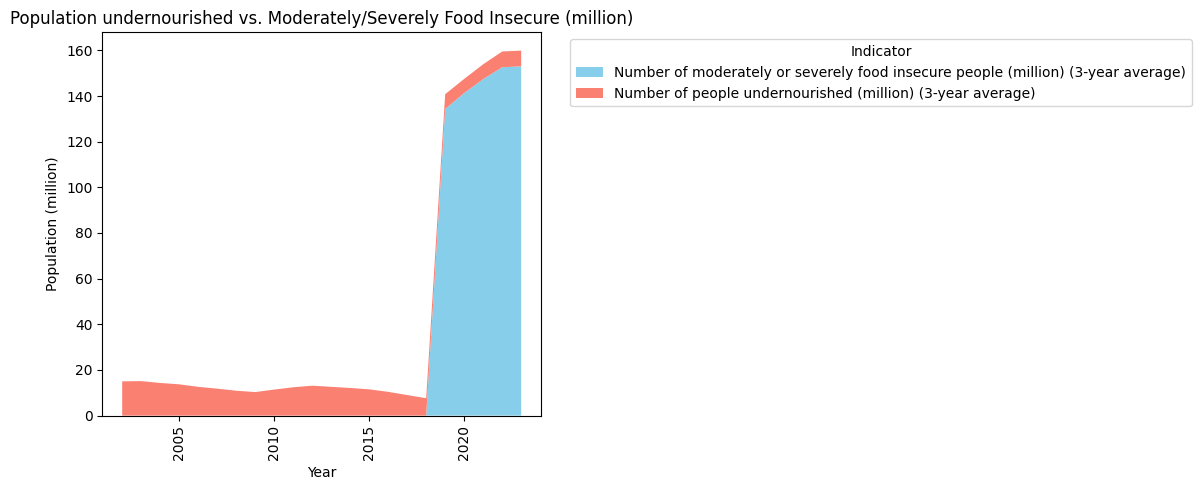

In [19]:
df_area = df_group1[df_group1['Item Code'].isin(['210011', '210081'])].copy()
df_area['Year'] = df_area['Year'].astype(int)
df_area['Value'] = df_area['Value'].astype(float)

df_agg = df_area.groupby(['Year', 'Item'])['Value'].sum().reset_index()
df_pivot = df_agg.pivot(index='Year', columns='Item', values='Value').fillna(0)

plt.figure(figsize=(12, 5))
plt.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, colors=['skyblue', 'salmon'])
plt.title('Population undernourished vs. Moderately/Severely Food Insecure (million)')
plt.xlabel('Year')
plt.ylabel('Population (million)')
plt.xticks(rotation=90)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Thematic: Structural and Lifestyle Determinants of Nutrition

This group captures **structural enablers of food security** (energy adequacy, protein, GDP, irrigation, water, sanitation) together with **emerging lifestyle-related nutrition risks** (child overweight, adult obesity, and dietary fat intake). It links the **food environment** to both **availability and overnutrition risks**.

---

## Indicators (code — exact item name)

1. **21010 – Average dietary energy supply adequacy (percent) (3-year average)**  
   Measures whether food energy supply meets population requirements.  
   *Questions:* Is the energy intake of the population sufficient?

2. **21013 – Average protein supply (g/cap/day) (3-year average)**  
   Tracks protein availability in national food supply.  
   *Questions:* Are protein needs adequately met?

3. **22013 – Gross domestic product per capita, PPP (constant 2017 international $)**  
   Proxy for household economic access to food.  
   *Questions:* How does income affect affordability and food access?

4. **21034 – Percent of arable land equipped for irrigation (percent) (3-year average)**  
   Reflects agricultural productivity and resilience capacity.  
   *Questions:* Is irrigation infrastructure supporting stable food production?

5. **21045 – Percentage of population using safely managed drinking water services (percent)**  
   Links water access to health and nutrition.  
   *Questions:* Do households have reliable access to safe water?

6. **21046 – Percentage of population using safely managed sanitation services (percent)**  
   Reflects sanitation and hygiene as determinants of nutritional health.  
   *Questions:* Are populations protected from sanitation-related health risks?

7. **21041 – Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)**  
   Indicator of early-life overnutrition.  
   *Questions:* Is child overweight emerging as a problem?

8. **21042 – Prevalence of obesity in the adult population (18 years and older) (percent)**  
   Tracks adult overnutrition and NCD risks.  
   *Questions:* How prevalent is obesity in adults?

9. **21057 – Average dietary energy requirement (kcal/cap/day)**  
   Defines the population’s baseline caloric needs.  
   *Questions:* How do food supply levels compare to actual requirements?

10. **21061 – Average fat supply (g/cap/day) (3-year average)**  
    Tracks fat availability in diets.  
    *Questions:* Is fat intake rising, potentially leading to obesity and NCD risks?

---

## Why This Group Matters
These indicators provide a **bridge between structural enablers and lifestyle outcomes**. They highlight how **food supply, economic capacity, infrastructure (irrigation, water, sanitation)** interact with **emerging risks of overweight and obesity**, helping policymakers balance **undernutrition and overnutrition** challenges.

In [20]:
df_group2 = df[df['Item Code'].isin([
    '21010',   # Average dietary energy supply adequacy (percent) (3-year average)
    '21013',   # Average protein supply (g/cap/day) (3-year average)
    '22013',   # Gross domestic product per capita, PPP, (constant 2017 international $)
    '21034',   # Percent of arable land equipped for irrigation (percent) (3-year average)
    '21045',   # Percentage of population using safely managed drinking water services (percent)
    '21046',   # Percentage of population using safely managed sanitation services (percent)
    '21041',   # Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)
    '21042',   # Prevalence of obesity in the adult population (18 years and older) (percent)
    '21057',   # Average dietary energy requirement (kcal/cap/day)
    '21061',   # Average fat supply (g/cap/day) (3-year average)
])]
df_group2.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
1,PHL,2000-01-01,2002-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,109.0,E,NaN
2,PHL,2001-01-01,2003-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,109.0,E,NaN
3,PHL,2002-01-01,2004-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,110.0,E,NaN
4,PHL,2003-01-01,2005-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,111.0,E,NaN
5,PHL,2004-01-01,2006-12-31,171.0,'608,Philippines,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20042006.0,2006,%,112.0,E,NaN


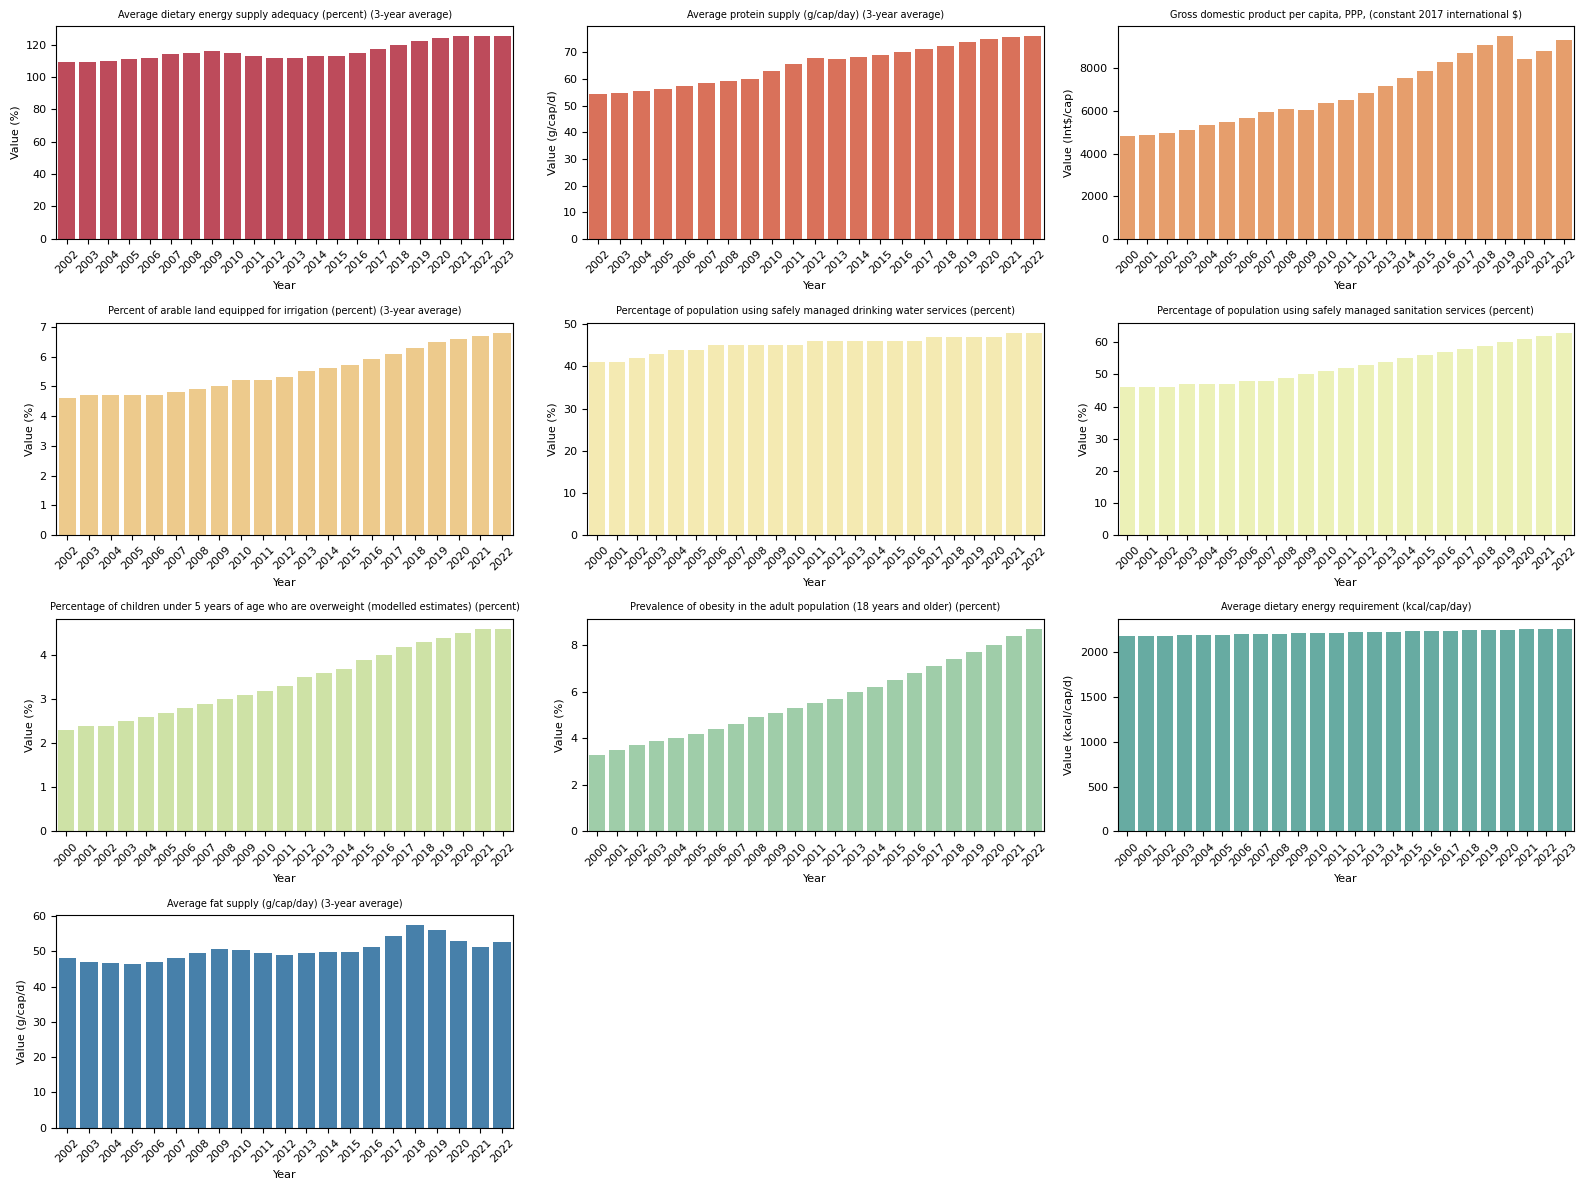

In [21]:
items2 = {
    '21010': 'Average dietary energy supply adequacy (percent) (3-year average)',
    '21013': 'Average protein supply (g/cap/day) (3-year average)',
    '22013': 'Gross domestic product per capita, PPP, (constant 2017 international $)',
    '21034': 'Percent of arable land equipped for irrigation (percent) (3-year average)',
    '21045': 'Percentage of population using safely managed drinking water services (percent)',
    '21046': 'Percentage of population using safely managed sanitation services (percent)',
    '21041': 'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
    '21042': 'Prevalence of obesity in the adult population (18 years and older) (percent)',
    '21057': 'Average dietary energy requirement (kcal/cap/day)',
    '21061': 'Average fat supply (g/cap/day) (3-year average)'
}

palette = sns.color_palette('Spectral', n_colors=len(items2))
n_cols = 3
n_rows = (len(items2) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, (code, label) in enumerate(items2.items()):
    df_temp = df_group2[df_group2['Item Code'] == code].copy()
    if df_temp.empty:
        continue

    df_temp['Year'] = df_temp['Year'].astype(int)
    df_temp['Value'] = df_temp['Value'].astype(float)
    
    unit = df_temp['Unit'].dropna().unique()
    unit_label = unit[0] if len(unit) > 0 else ""
    
    sns.barplot(x='Year', y='Value', data=df_temp, color=palette[i], ax=axes[i])
    axes[i].set_title(label, fontsize=7)
    axes[i].set_xlabel('Year', fontsize=8)
    axes[i].set_ylabel(f"Value ({unit_label})", fontsize=8)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Relationship Between Nutrition & Economic Status

This visualization examines the relationship between **GDP per capita** and **nutritional supply** in the Philippines, highlighting how economic capacity may influence dietary adequacy:

- **GDP per capita (22013)**: Measures the economic output per person, reflecting a country’s wealth.  
- **Dietary energy supply adequacy (21010)**: Represents whether the average dietary energy intake meets minimum nutritional requirements.  
- **Average protein supply (21013)**: Indicates the daily protein availability per person.

**Key Features of the Visualization**:  
- Scatter plots with GDP on the x-axis and nutrient supply on the y-axis.  
- Trend lines to highlight correlation between economic wealth and nutrition.  
- Allows visual comparison of **energy & protein supply** relative to GDP.

**Insights You Can Explore**:  
- Do wealthier periods or regions correspond to higher energy & protein supply?  
- Are increases in GDP consistently accompanied by better nutritional adequacy?  
- Identify potential **policy implications** for economic development and nutrition programs.


In [22]:
df_gdp = df_group2[df_group2['Item Code'] == '22013'][['Year', 'Value']].rename(columns={'Value': 'GDP per capita'})
df_energy = df_group2[df_group2['Item Code'] == '21010'][['Year', 'Value']].rename(columns={'Value': 'Dietary Energy supply'})
df_protein = df_group2[df_group2['Item Code'] == '21013'][['Year', 'Value']].rename(columns={'Value': 'Protein supply'})

df_merged = df_gdp.merge(df_energy, on='Year').merge(df_protein, on='Year')

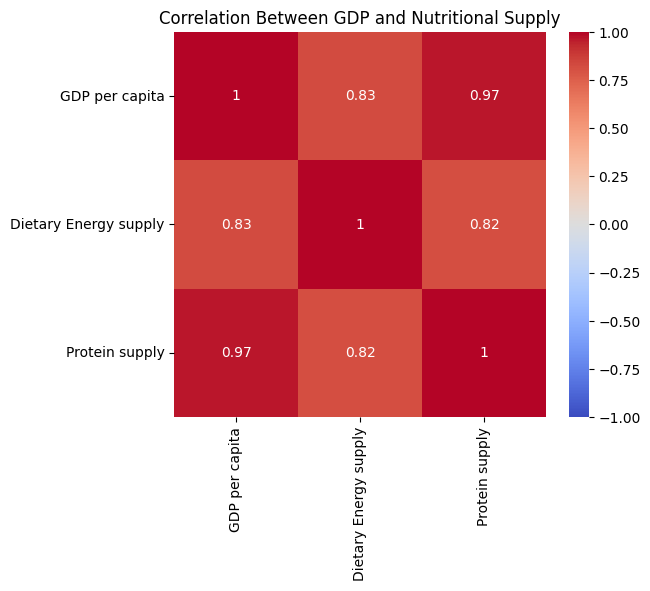

In [23]:
corr = df_merged[['GDP per capita', 'Dietary Energy supply', 'Protein supply']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between GDP and Nutritional Supply')
plt.show()

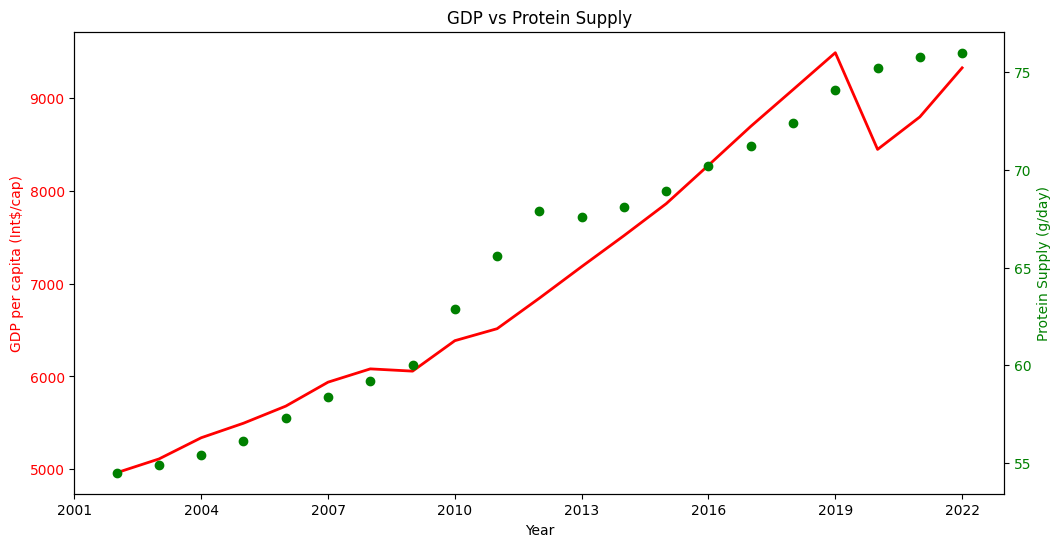

In [24]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_merged['Year'], df_merged['GDP per capita'], color='red', label='GDP per capita', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita (Int$/cap)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.scatter(df_merged['Year'], df_merged['Protein supply'], color='green', label='Protein Supply')
ax2.set_ylabel('Protein Supply (g/day)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Force integer ticks on x-axis
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('GDP vs Protein Supply')
plt.show()

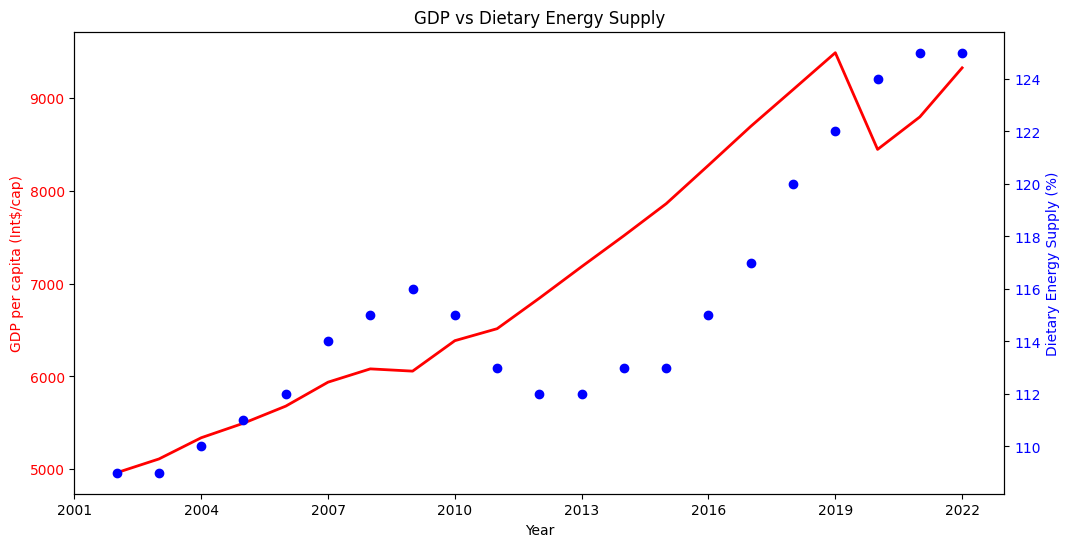

In [25]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_merged['Year'], df_merged['GDP per capita'], color='red', label='GDP per capita', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita (Int$/cap)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.scatter(df_merged['Year'], df_merged['Dietary Energy supply'], color='blue', label='Dietary Energy supply')
ax2.set_ylabel('Dietary Energy Supply (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('GDP vs Dietary Energy Supply')
plt.show()

## Association Between Nutrient Intake & Adult Obesity

This visualization explores the connection between **nutrient intake** and **adult obesity prevalence**, providing insights into overnutrition trends:

- **Dietary energy supply (21010)**: Average daily caloric intake per person.  
- **Average protein supply (21013)** and **Average fat supply (21061)**: Indicators of nutrient richness in the diet.  
- **Adult obesity prevalence (21042)**: Percentage of adults who are classified as obese.

**Key Features of the Visualization**:  
- Scatter plots of energy, protein, & fat supply against obesity prevalence.  
- Trend lines to show correlations between nutrient intake & obesity.  
- Helps compare which nutrient (energy, protein, fat) is most associated with obesity.

**Insights You Can Explore**:  
- Does higher nutrient intake correspond to higher obesity rates?  
- Are certain nutrients more strongly correlated with obesity than others?  
- Guides **public health strategies** targeting nutrition & obesity prevention.


## Impact of Water & Sanitation Infrastructure on Nutrition

This visualization examines how **access to clean water and sanitation** relates to **dietary energy supply**, emphasizing the role of infrastructure in nutrition:

- **Population using safely managed drinking water services (21045)**: Percentage of people with access to safe drinking water.  
- **Population using safely managed sanitation services (21046)**: Percentage of people with proper sanitation facilities.  
- **Dietary energy supply adequacy (21010)**: Daily energy supply relative to nutritional requirements.

**Key Features of the Visualization**:  
- Scatter plots of water & sanitation access against dietary energy supply.  
- Trend lines to highlight correlations between infrastructure & nutrition.  
- Visualizes the impact of public health infrastructure on food security.

**Insights You Can Explore**:  
- Do improvements in water & sanitation correlate with better dietary energy supply?  
- Can regions with poor infrastructure be targeted for nutrition interventions?  
- Supports **policy planning** to combine infrastructure development with nutritional programs.
